## Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. 
Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. 
Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. 
That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

2372
NCR 709
Bangalore 635
Mumbai 449


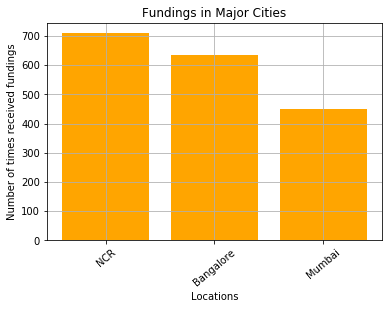

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#opening the csv file
df = pd.read_csv("startup_funding.csv")

#dealing with NA entries
df["CityLocation"].dropna(inplace = True)

#Changing the given city names as given in the question
df.CityLocation.replace("bangalore", "Bangalore", inplace = True)
df.CityLocation.replace("Delhi", "New Delhi", inplace = True)

#this function will give us first city in case of multiple cities
def seperateCity (city):
    return city.split('/')[0].strip()

#applying the function above
df["CityLocation"] = df["CityLocation"].apply(seperateCity)

#creating the np arrays for city 
city = np.array(df["CityLocation"])
print(len(city))


#dictionary for city:no.oftimes pair considering NCR as 1
d = {}
for i in range(len(city)):
    cty = city[i]
    if "Bangalore" == cty or "Mumbai" == cty:
        d[cty] = d.get(cty, 0) + 1
    elif 'New Delhi' == cty or 'Gurgaon' == cty or 'Noida' == cty:
        d["NCR"] = d.get("NCR", 0) + 1
        
## Considering NCR as 3 different locations
# d = {}
# for i in range(len(city)):
#     cty = city[i]
#     if "Bangalore" == cty or "Mumbai" == cty or 'New Delhi' == cty or 'Gurgaon' == cty or 'Noida' == cty:
#         d[cty] = d.get(cty, 0) + 1
        
        
#sorting the dictionary on basis of value in decreasing order
ans = sorted(d.items(), key = lambda x:x[1], reverse = True)
#creating city and amount array to plot graphs using them
city = []
times = []
for i in ans:
    print(i[0], i[1])
    city.append(i[0])
    times.append(i[1])
    
#creating a bar graph
x = np.arange(3)
plt.bar(x, times, color = "Orange", alpha = 1)
plt.grid()
plt.xlabel("Locations")
plt.ylabel("Number of times received fundings")
plt.title("Fundings in Major Cities")
plt.xticks(x, city, rotation = 40)
plt.show()

#creating a pie chart
# plt.pie(times, explode = [0.05, 0.04, 0.04], colors = ["cadetblue", "Pink", "mediumseagreen"], autopct = "%.2f %%")
# plt.title("Fundings in major cities")
# plt.axis("equal")
# plt.legend(city)
# plt.show()
